### Importing the Libraries

In [2]:
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt

### Extracting the data from the Tables

In [5]:
dbname = 'loan_management'
user = 'postgres'
password = 'simi280498'
host = '127.0.0.1'
port = '5432'

In [7]:
#Establishing the connection
engine = create_engine(f'postgresql://{user}:{password}@{host}/{dbname}')

In [9]:
# Define your SELECT query
query = '''SELECT * FROM borrower as b 
         inner join loan_to_income as lti 
         on b.borrower_id = lti.borrower_id 
         inner join loan as l
         on lti.loan_id = l.loan_id'''

In [11]:
df = pd.read_sql_query(query, engine)
print("Data loaded successfully!")

Data loaded successfully!


In [13]:
df.head()

,borrower_id,age,income,credit_score,months_employed,num_credit_lines,dti_ratio,education,employment_type,marital_status,...,has_cosigner,loan_id,borrower_id,loan_amount_to_income,loan_id,loan_amount,interest_rate,loan_term,loan_purpose,defaulter
0,BPNRE399EUV,54,74954,635,59,4,0.40,Bachelor's,Unemployed,Single,...,1,PNRE399EUV,BPNRE399EUV,3.231262,PNRE399EUV,242196,9.05,36,Education,0
1,BTNHNNVH282,52,96409,577,93,1,0.65,Master's,Unemployed,Married,...,1,TNHNNVH282,BTNHNNVH282,1.499487,TNHNNVH282,144564,21.20,36,Education,0
2,B4066OHTN9A,61,134076,602,6,2,0.84,Master's,Unemployed,Divorced,...,1,4066OHTN9A,B4066OHTN9A,1.050785,4066OHTN9A,140885,22.89,60,Other,0
3,BF50KOUWNHK,57,97979,497,43,4,0.65,Master's,Full-time,Married,...,0,F50KOUWNHK,BF50KOUWNHK,1.499097,F50KOUWNHK,146880,12.95,60,Business,0
4,B2E09521FTY,39,91414,811,114,3,0.33,High School,Full-time,Divorced,...,1,2E09521FTY,B2E09521FTY,1.147822,2E09521FTY,104927,3.35,24,Education,0


In [15]:
engine.dispose()

In [17]:
df.shape

(255347, 23)

In [19]:
#dropping columns which are not required
df = df.drop(['borrower_id', 'loan_id'], axis=1)

In [21]:
df.head()

,age,income,credit_score,months_employed,num_credit_lines,dti_ratio,education,employment_type,marital_status,income_per_credit_line,has_mortgage,has_dependents,has_cosigner,loan_amount_to_income,loan_amount,interest_rate,loan_term,loan_purpose,defaulter
0,54,74954,635,59,4,0.40,Bachelor's,Unemployed,Single,18738.500000,1,1,1,3.231262,242196,9.05,36,Education,0
1,52,96409,577,93,1,0.65,Master's,Unemployed,Married,96409.000000,0,1,1,1.499487,144564,21.20,36,Education,0
2,61,134076,602,6,2,0.84,Master's,Unemployed,Divorced,67038.000000,0,1,1,1.050785,140885,22.89,60,Other,0
3,57,97979,497,43,4,0.65,Master's,Full-time,Married,24494.750000,1,1,0,1.499097,146880,12.95,60,Business,0
4,39,91414,811,114,3,0.33,High School,Full-time,Divorced,30471.333333,1,0,1,1.147822,104927,3.35,24,Education,0


In [23]:
df.shape

(255347, 19)

### Correlation Matrix

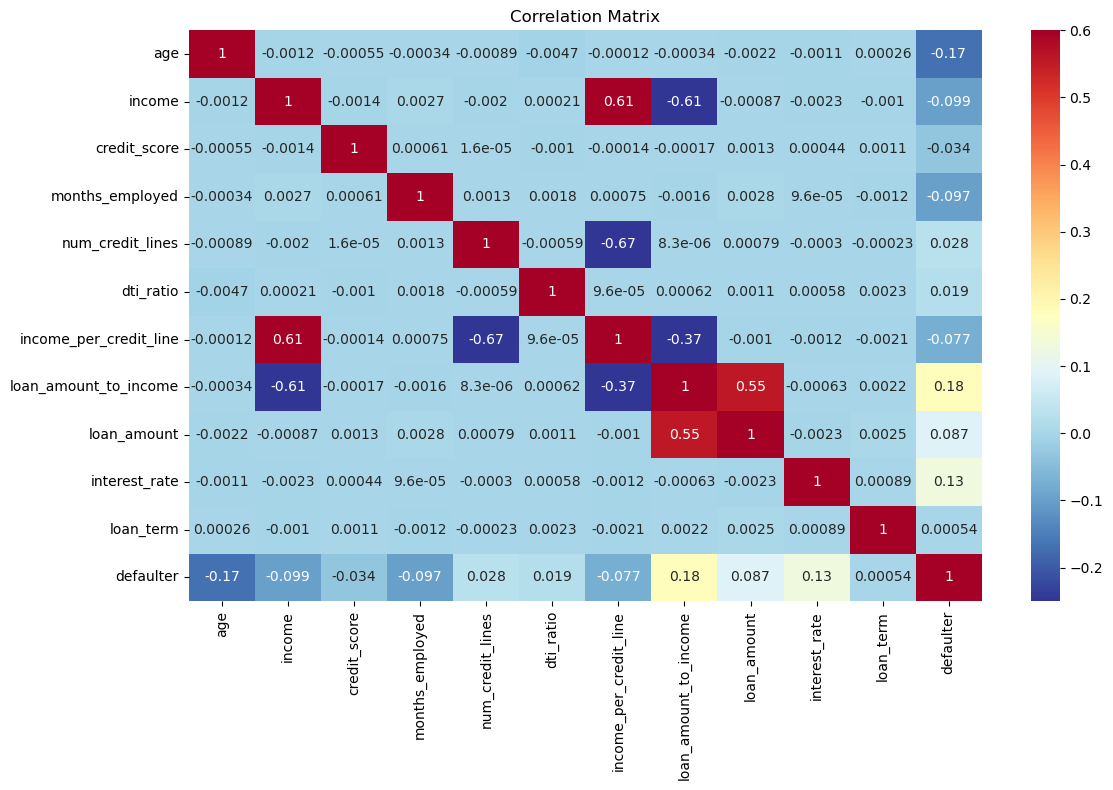

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[['age', 'income', 'credit_score', 'months_employed','num_credit_lines', 
                  'dti_ratio', 'income_per_credit_line', 'loan_amount_to_income', 
                  'loan_amount', 'interest_rate', 'loan_term', 'defaulter']].corr(), 
            cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot=True, vmax = 0.6)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('Correlation Matrix.png')
plt.show()

### Proving the Trends found using EDA

In [29]:
# Function to plot the distribution of a variable colored by value of the target
def kde_default(var_name, df):
    
    # Calculate the correlation coefficient between the new variable and the target
    corr = df['defaulter'].corr(df[var_name])
    
    # Calculate medians for repaid vs not repaid
    avg_repaid = df.loc[df['defaulter'] == 0, var_name].median()
    avg_not_repaid = df.loc[df['defaulter'] == 1, var_name].median()
    
    plt.figure(figsize=(12, 6))
    
    # Plot the distribution for target == 0 and target == 1
    sns.kdeplot(df.loc[df['defaulter'] == 0, var_name], label='Default == 0')
    sns.kdeplot(df.loc[df['defaulter'] == 1, var_name], label='Default == 1')
    
    # Label the plot
    plt.xlabel(var_name)
    plt.ylabel('Density')
    plt.title('%s Distribution' % var_name)
    plt.legend()
    
    # Print out the correlation
    print('The correlation between %s and the TARGET is %0.4f' % (var_name, corr))
    
    # Print out average values
    print('Median value for loan that was not repaid = %0.4f' % avg_not_repaid)
    print('Median value for loan that was repaid = %0.4f' % avg_repaid)

#### Trend 1 - Lesser the Age more the Chances of Default Rate

The correlation between age and the TARGET is -0.1678
Median value for loan that was not repaid = 34.0000
Median value for loan that was repaid = 45.0000


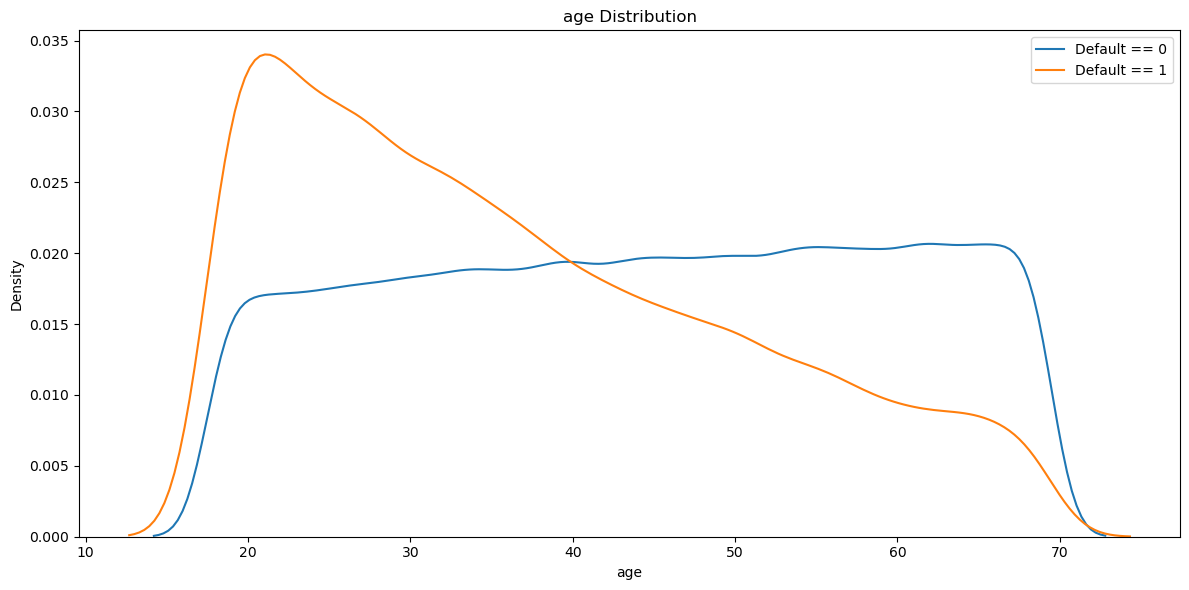

In [32]:
kde_default('age', df)
plt.tight_layout()
plt.savefig('Trend_1.png')

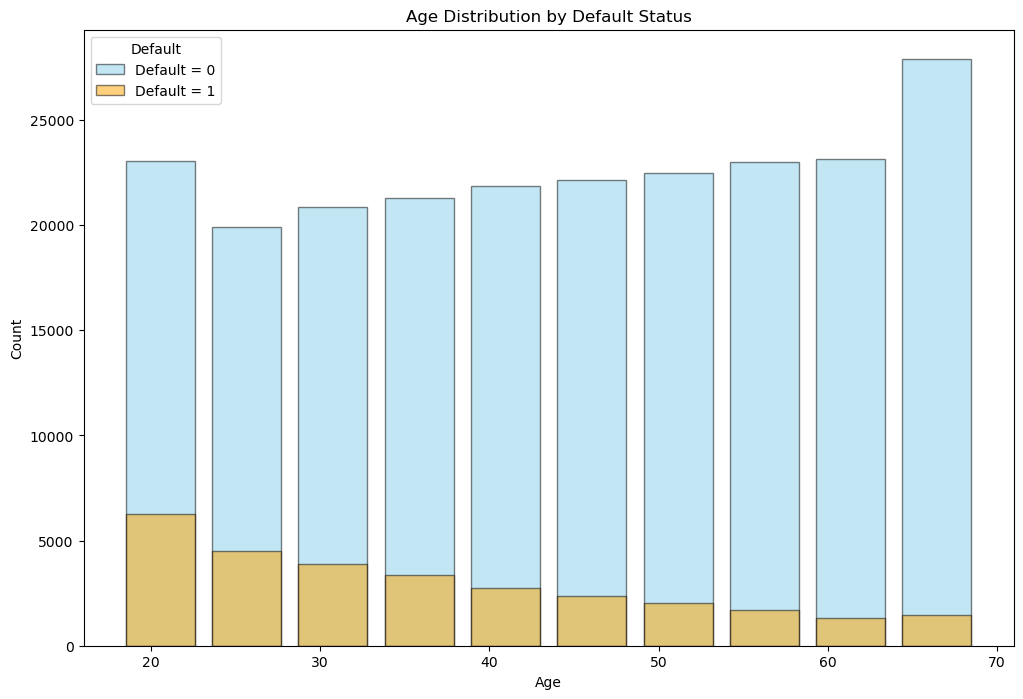

In [34]:
age_default_0 = df[df['defaulter'] == 0]['age']
age_default_1 = df[df['defaulter'] == 1]['age']

# Plotting histograms
plt.figure(figsize=(12, 8))
plt.hist(age_default_0, bins=10, alpha=0.5, label='Default = 0', color='skyblue', edgecolor='black', rwidth = 0.8)
plt.hist(age_default_1, bins=10, alpha=0.5, label='Default = 1', color='orange', edgecolor='black', rwidth = 0.8)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Default Status')
plt.legend(title='Default')
plt.savefig('Trend_1_bar_graph.png')
# Show plot
plt.show()

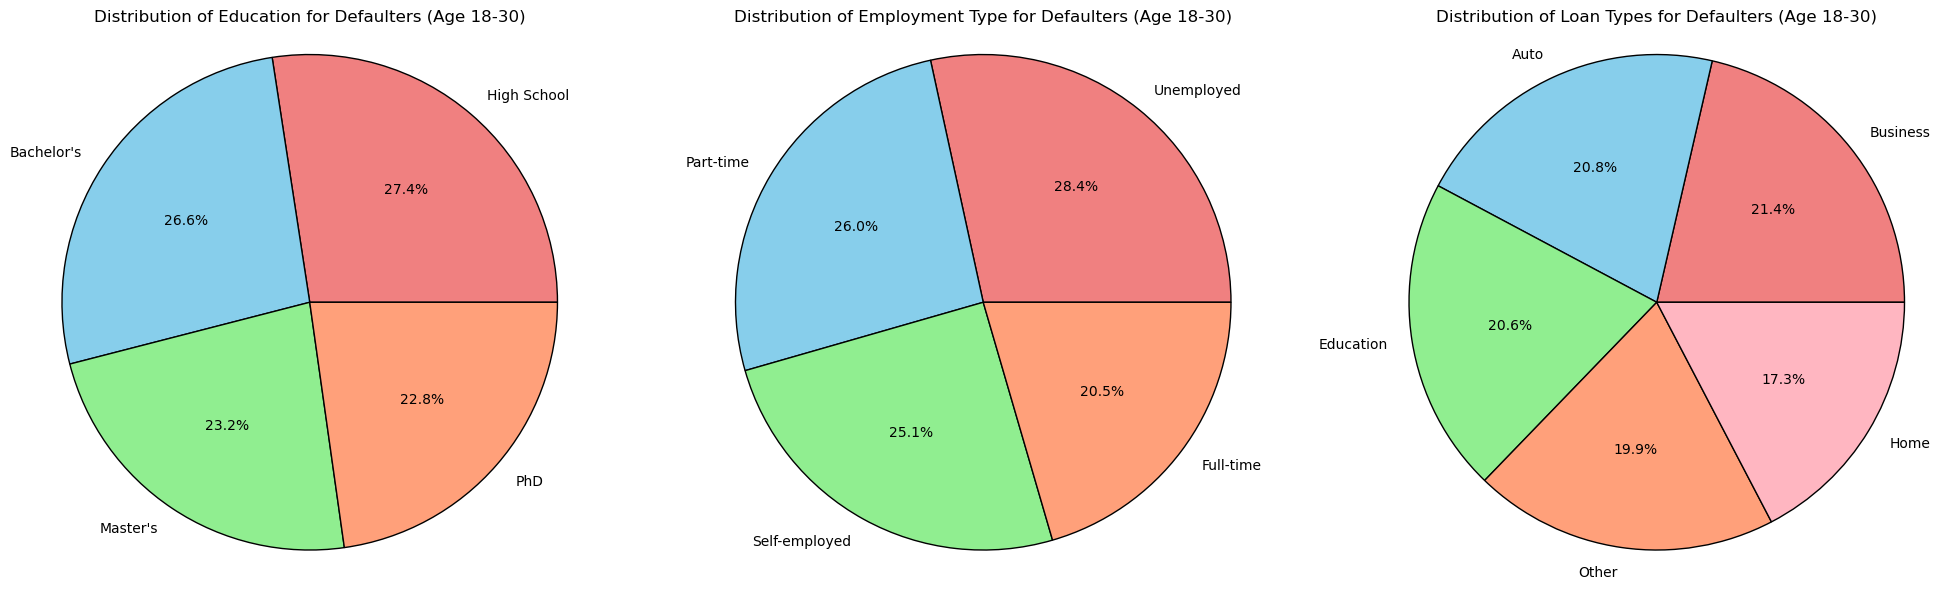

In [36]:
filtered_df = df[(df['age'] >= 18) & (df['age'] <= 30) & (df['defaulter'] == 1) ]

# Get the distribution of education
education_counts = filtered_df['education'].value_counts()


plt.figure(figsize=(20, 6))

# Plotting the distribution as a pie chart
plt.subplot(1, 3, 1)
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'skyblue', 'lightgreen', 'lightsalmon'],
        wedgeprops={'edgecolor': 'black'})

# Adding labels and title
plt.title('Distribution of Education for Defaulters (Age 18-30)')
plt.axis('equal')  

# Get the distribution of employment type
employment_counts = filtered_df['employment_type'].value_counts()

# Plotting the distribution as a pie chart
plt.subplot(1, 3, 2)
plt.pie(employment_counts, labels=employment_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'skyblue', 'lightgreen', 'lightsalmon'],
        wedgeprops={'edgecolor': 'black'})

# Adding labels and title
plt.title('Distribution of Employment Type for Defaulters (Age 18-30)')
plt.axis('equal')  

# Get the distribution of loan purpose
loan_purpose_counts = filtered_df['loan_purpose'].value_counts()
plt.subplot(1, 3, 3)
plt.pie(loan_purpose_counts, labels=loan_purpose_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'skyblue', 'lightgreen', 'lightsalmon', 'lightpink'],
        wedgeprops={'edgecolor': 'black'})

# Adding labels and title
plt.title('Distribution of Loan Types for Defaulters (Age 18-30)')
plt.axis('equal') 


plt.tight_layout()
plt.savefig('Reasons.png')

# Show plot
plt.show()

#### Trend 2 - More the Interest Rate more the Chances of Default Rate

The correlation between interest_rate and the TARGET is 0.1313
Median value for loan that was not repaid = 16.9300
Median value for loan that was repaid = 12.9900


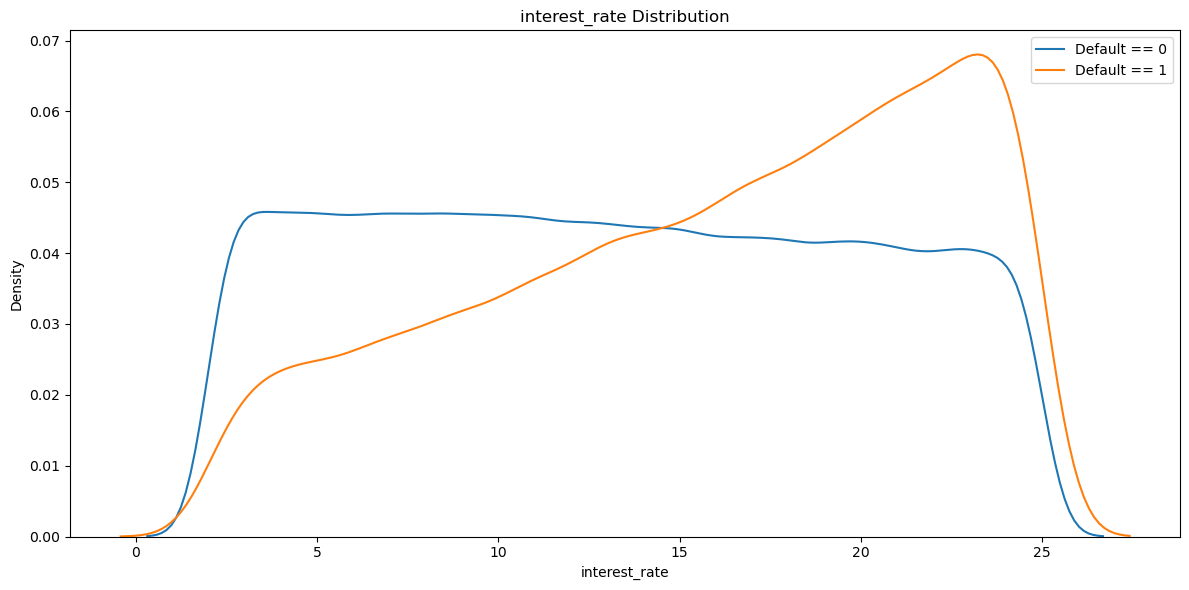

In [38]:
kde_default('interest_rate', df)
plt.tight_layout()
plt.savefig('Trend_2.png')

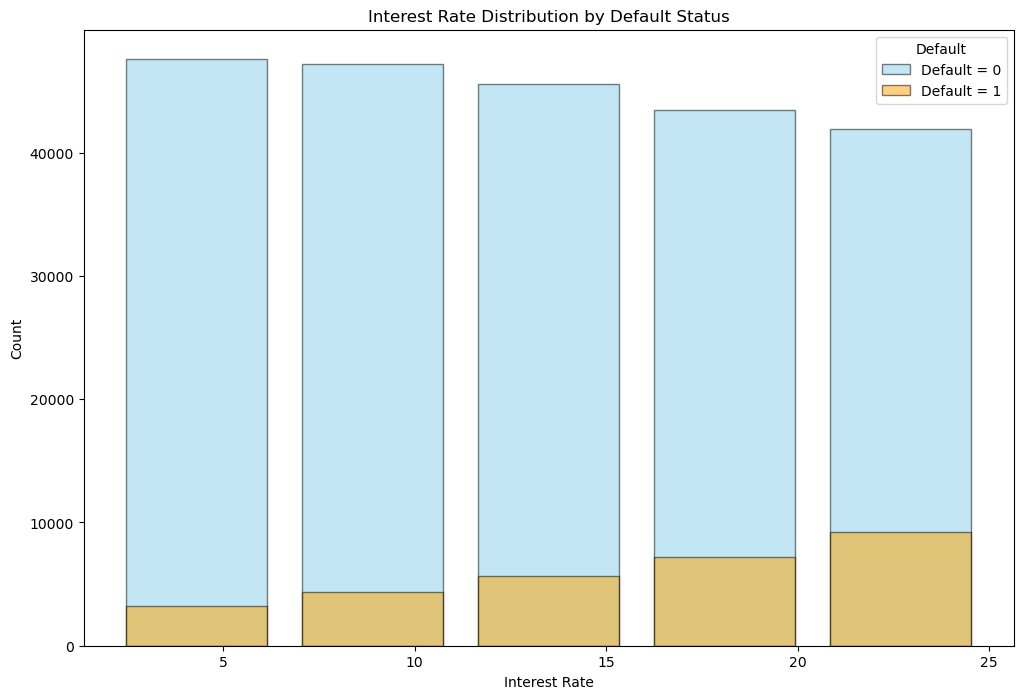

In [40]:
interest_rate_default_0 = df[df['defaulter'] == 0]['interest_rate']
interest_rate_default_1 = df[df['defaulter'] == 1]['interest_rate']

# Plotting histograms
plt.figure(figsize=(12, 8))
plt.hist(interest_rate_default_0, bins=5, alpha=0.5, label='Default = 0', color='skyblue', edgecolor='black', rwidth = 0.8)
plt.hist(interest_rate_default_1, bins=5, alpha=0.5, label='Default = 1', color='orange', edgecolor='black', rwidth = 0.8)

# Adding labels and title
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Interest Rate Distribution by Default Status')
plt.legend(title='Default')

plt.savefig('Trend_2_bar_graph.png')
# Show plot
plt.show()

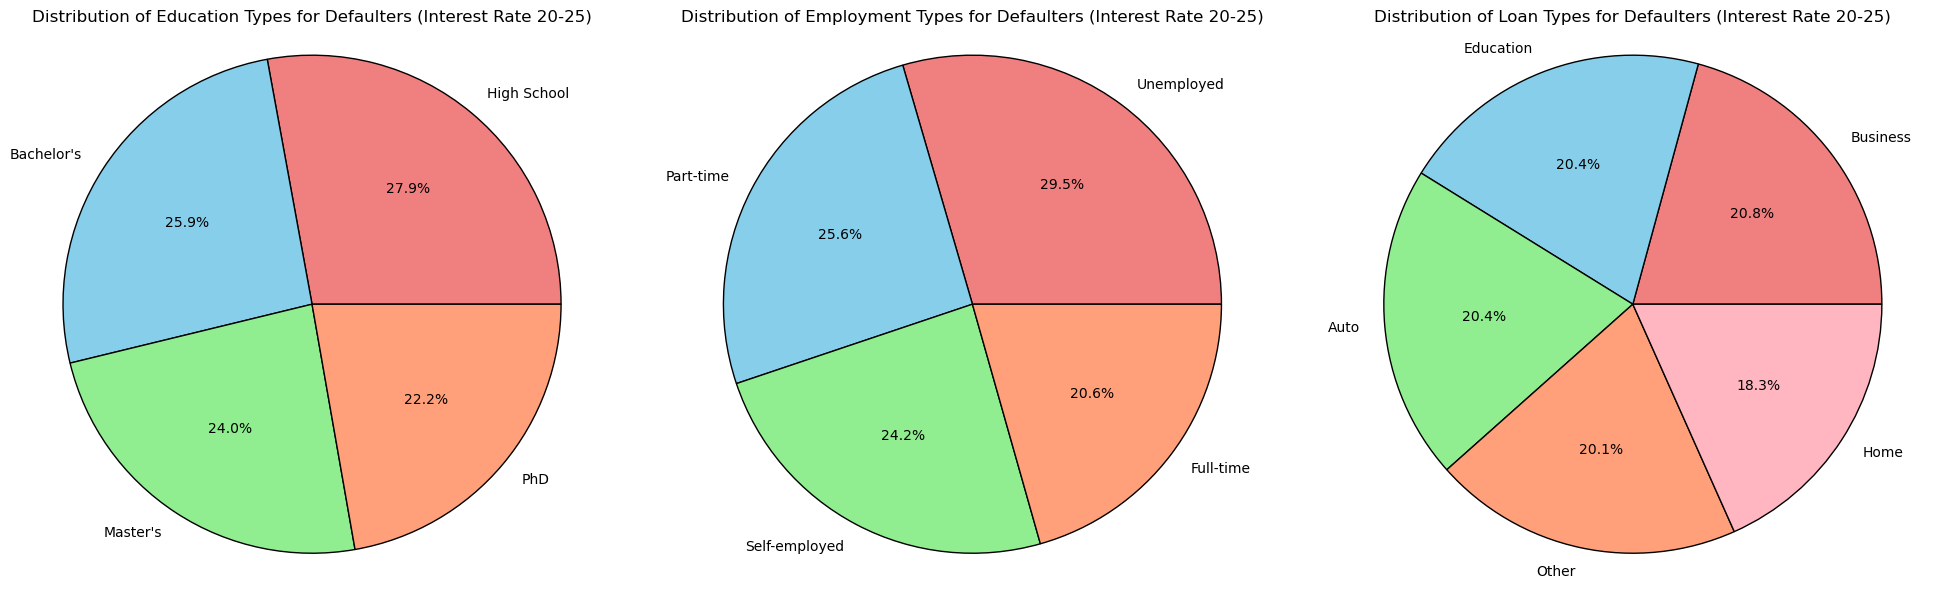

In [43]:
filtered_df = df[(df['interest_rate'] >= 20) & (df['interest_rate'] <= 25) & (df['defaulter'] == 1) ]

# Get the distribution of education
education_counts = filtered_df['education'].value_counts()

plt.figure(figsize=(20, 6))

# Plotting the distribution as a pie chart
plt.subplot(1, 3, 1)
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'skyblue', 'lightgreen', 'lightsalmon'],
        wedgeprops={'edgecolor': 'black'})

# Adding labels and title
plt.title('Distribution of Education Types for Defaulters (Interest Rate 20-25)')
plt.axis('equal')

# Get the distribution of employment type
employment_counts = filtered_df['employment_type'].value_counts()

# Plotting the distribution as a pie chart
plt.subplot(1, 3, 2)
plt.pie(employment_counts, labels=employment_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'skyblue', 'lightgreen', 'lightsalmon'],
        wedgeprops={'edgecolor': 'black'})

# Adding labels and title
plt.title('Distribution of Employment Types for Defaulters (Interest Rate 20-25)')
plt.axis('equal')

# Get the distribution of loan purpose
loan_purpose_counts = filtered_df['loan_purpose'].value_counts()

# Plotting the distribution as a pie chart
plt.subplot(1, 3, 3)
plt.pie(loan_purpose_counts, labels=loan_purpose_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'skyblue', 'lightgreen', 'lightsalmon', 'lightpink'],
        wedgeprops={'edgecolor': 'black'})

# Adding labels and title
plt.title('Distribution of Loan Types for Defaulters (Interest Rate 20-25)')
plt.axis('equal')


plt.tight_layout()

# Show plot
plt.show()

#### Trend 3 - Lesser the Income more the Chances of Default Rate

The correlation between income and the TARGET is -0.0991
Median value for loan that was not repaid = 66566.0000
Median value for loan that was repaid = 84237.5000


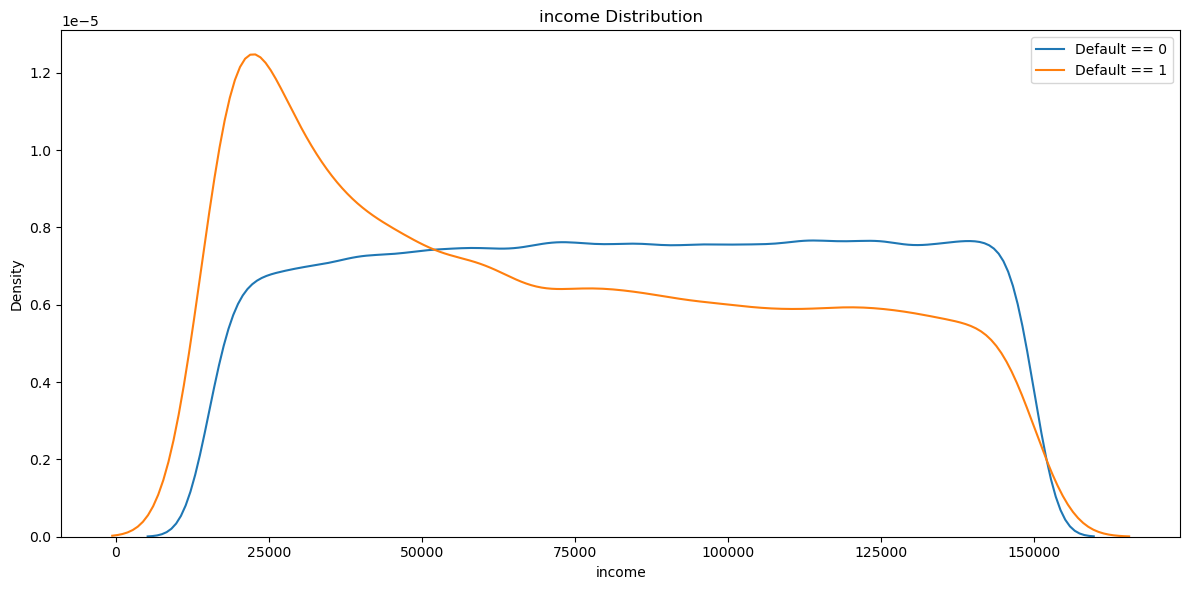

In [46]:
kde_default('income', df)
plt.tight_layout()
plt.savefig('Trend_3.png')

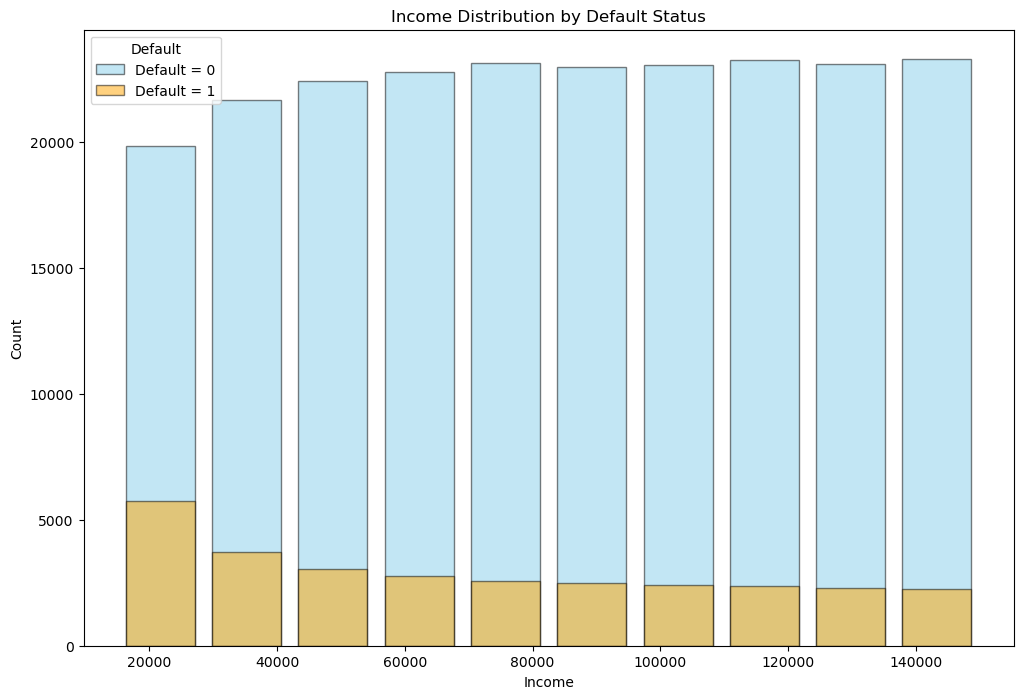

In [42]:
income_default_0 = df[df['defaulter'] == 0]['income']
income_default_1 = df[df['defaulter'] == 1]['income']

# Plotting histograms
plt.figure(figsize=(12, 8))
plt.hist(income_default_0, bins=10, alpha=0.5, label='Default = 0', color='skyblue', edgecolor='black', rwidth = 0.8)
plt.hist(income_default_1, bins=10, alpha=0.5, label='Default = 1', color='orange', edgecolor='black', rwidth = 0.8)

# Adding labels and title
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Distribution by Default Status')
plt.legend(title='Default')

plt.savefig('Trend_3_bar_graph.png')

# Show plot
plt.show()

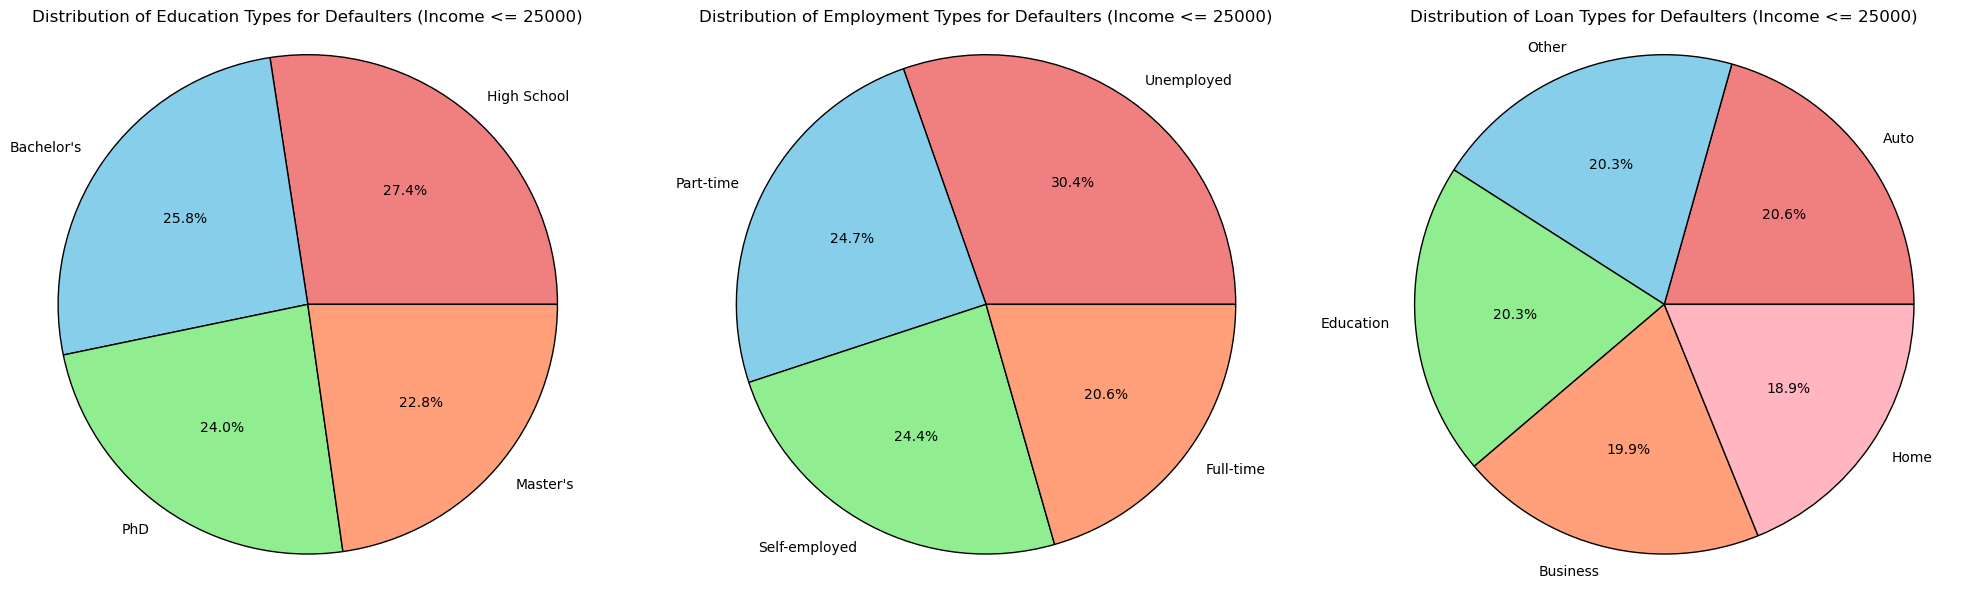

In [50]:
filtered_df = df[(df['income'] <= 25000) & (df['defaulter'] == 1) ]

# Get the distribution of education
education_counts = filtered_df['education'].value_counts()

plt.figure(figsize=(20, 6))

# Plotting the distribution as a pie chart
plt.subplot(1, 3, 1)
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'skyblue', 'lightgreen', 'lightsalmon'],
        wedgeprops={'edgecolor': 'black'})

# Adding labels and title
plt.title('Distribution of Education Types for Defaulters (Income <= 25000)')
plt.axis('equal')

# Get the distribution of employment type
employment_counts = filtered_df['employment_type'].value_counts()

# Plotting the distribution as a pie chart
plt.subplot(1, 3, 2)
plt.pie(employment_counts, labels=employment_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'skyblue', 'lightgreen', 'lightsalmon'],
        wedgeprops={'edgecolor': 'black'})

# Adding labels and title
plt.title('Distribution of Employment Types for Defaulters (Income <= 25000)')
plt.axis('equal')

# Get the distribution of loan purpose
loan_purpose_counts = filtered_df['loan_purpose'].value_counts()

# Plotting the distribution as a pie chart
plt.subplot(1, 3, 3)
plt.pie(loan_purpose_counts, labels=loan_purpose_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'skyblue', 'lightgreen', 'lightsalmon', 'lightpink'],
        wedgeprops={'edgecolor': 'black'})

# Adding labels and title
plt.title('Distribution of Loan Types for Defaulters (Income <= 25000)')
plt.axis('equal') 


plt.tight_layout()

# Show plot
plt.show()

#### Trend 4 - Lesser the Credit Score more the Chances of Default Rate

The correlation between credit_score and the TARGET is -0.0342
Median value for loan that was not repaid = 553.0000
Median value for loan that was repaid = 577.0000


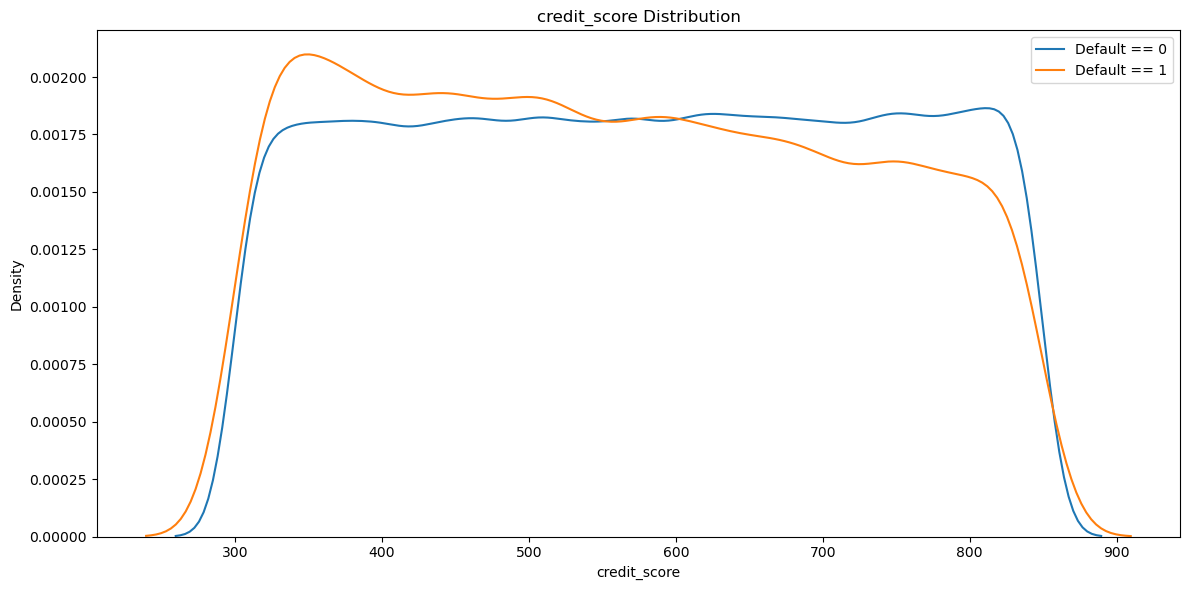

In [53]:
kde_default('credit_score', df)
plt.tight_layout()
plt.savefig('Trend_4.png')

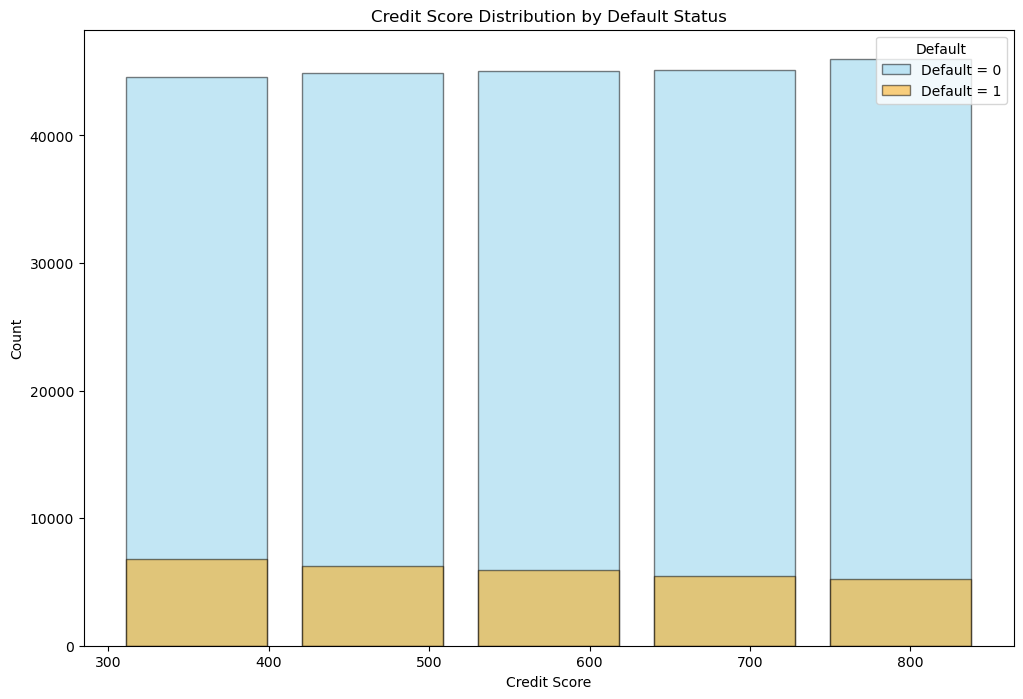

In [44]:
credit_score_default_0 = df[df['defaulter'] == 0]['credit_score']
credit_score_default_1 = df[df['defaulter'] == 1]['credit_score']

# Plotting histograms
plt.figure(figsize=(12, 8))
plt.hist(credit_score_default_0, bins=5, alpha=0.5, label='Default = 0', color='skyblue', edgecolor='black', rwidth = 0.8)
plt.hist(credit_score_default_1, bins=5, alpha=0.5, label='Default = 1', color='orange', edgecolor='black', rwidth = 0.8)

# Adding labels and title
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.title('Credit Score Distribution by Default Status')
plt.legend(title='Default')

plt.savefig('Trend_4_bar_graph.png')

# Show plot
plt.show()

#### Trend 5 - More the Loan Amount more the Chances of Default Rate

The correlation between loan_amount and the TARGET is 0.0867
Median value for loan that was not repaid = 152672.0000
Median value for loan that was repaid = 124236.0000


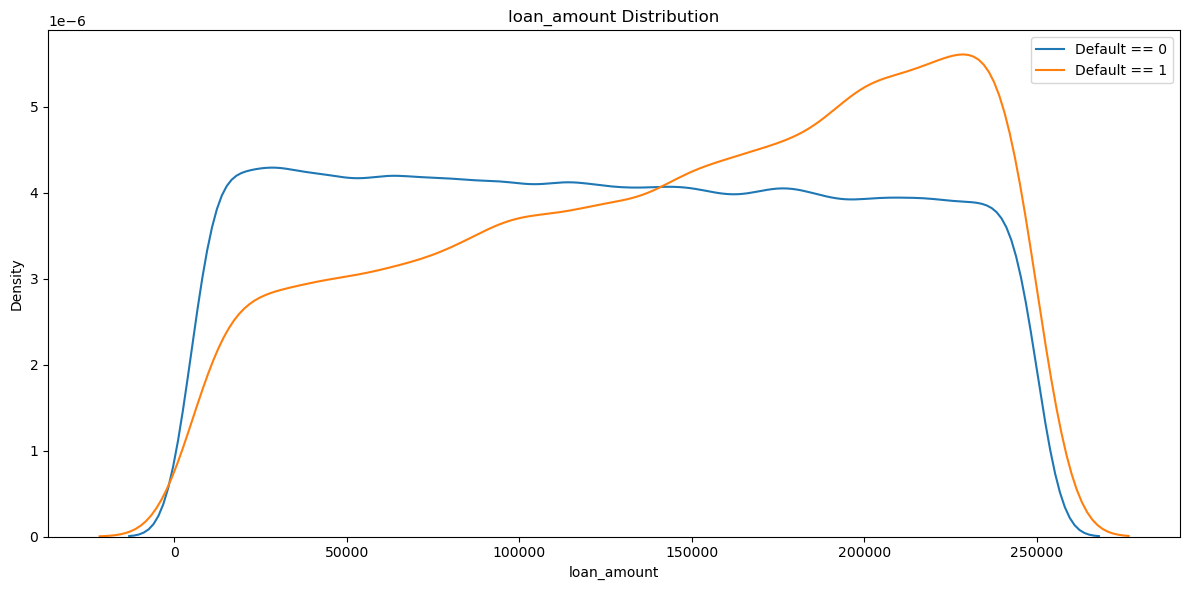

In [58]:
kde_default('loan_amount', df)
plt.tight_layout()
plt.savefig('Trend_5.png')

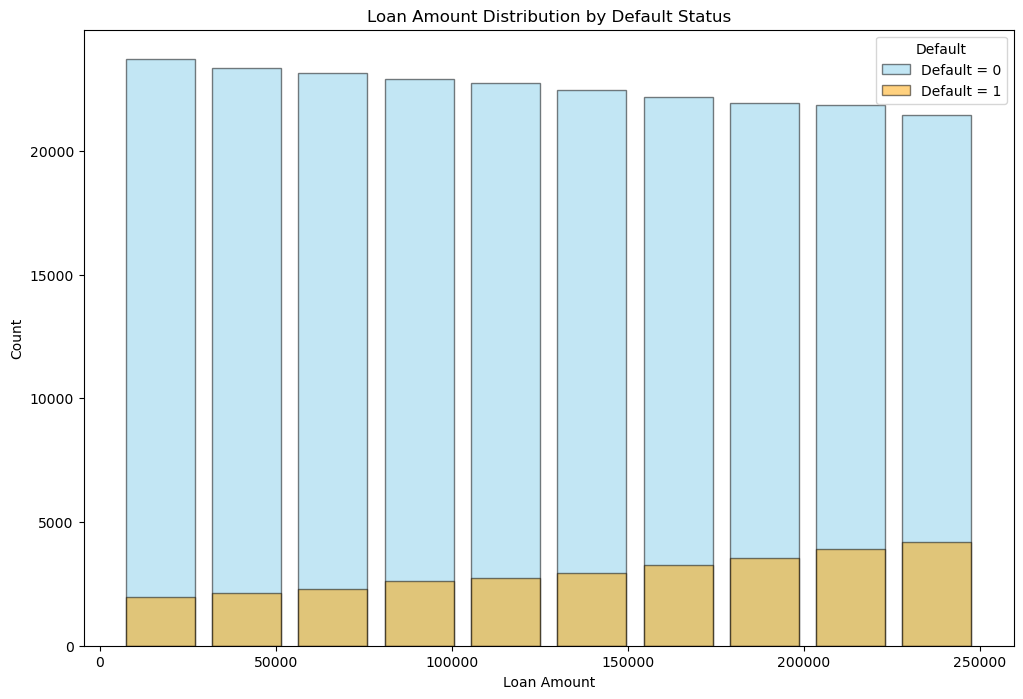

In [46]:
loan_amount_default_0 = df[df['defaulter'] == 0]['loan_amount']
loan_amount_default_1 = df[df['defaulter'] == 1]['loan_amount']

# Plotting histograms
plt.figure(figsize=(12, 8))
plt.hist(loan_amount_default_0, bins=10, alpha=0.5, label='Default = 0', color='skyblue', edgecolor='black', rwidth = 0.8)
plt.hist(loan_amount_default_1, bins=10, alpha=0.5, label='Default = 1', color='orange', edgecolor='black', rwidth = 0.8)

# Adding labels and title
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Loan Amount Distribution by Default Status')
plt.legend(title='Default')

plt.savefig('Trend_5_bar_graph.png')

# Show plot
plt.show()

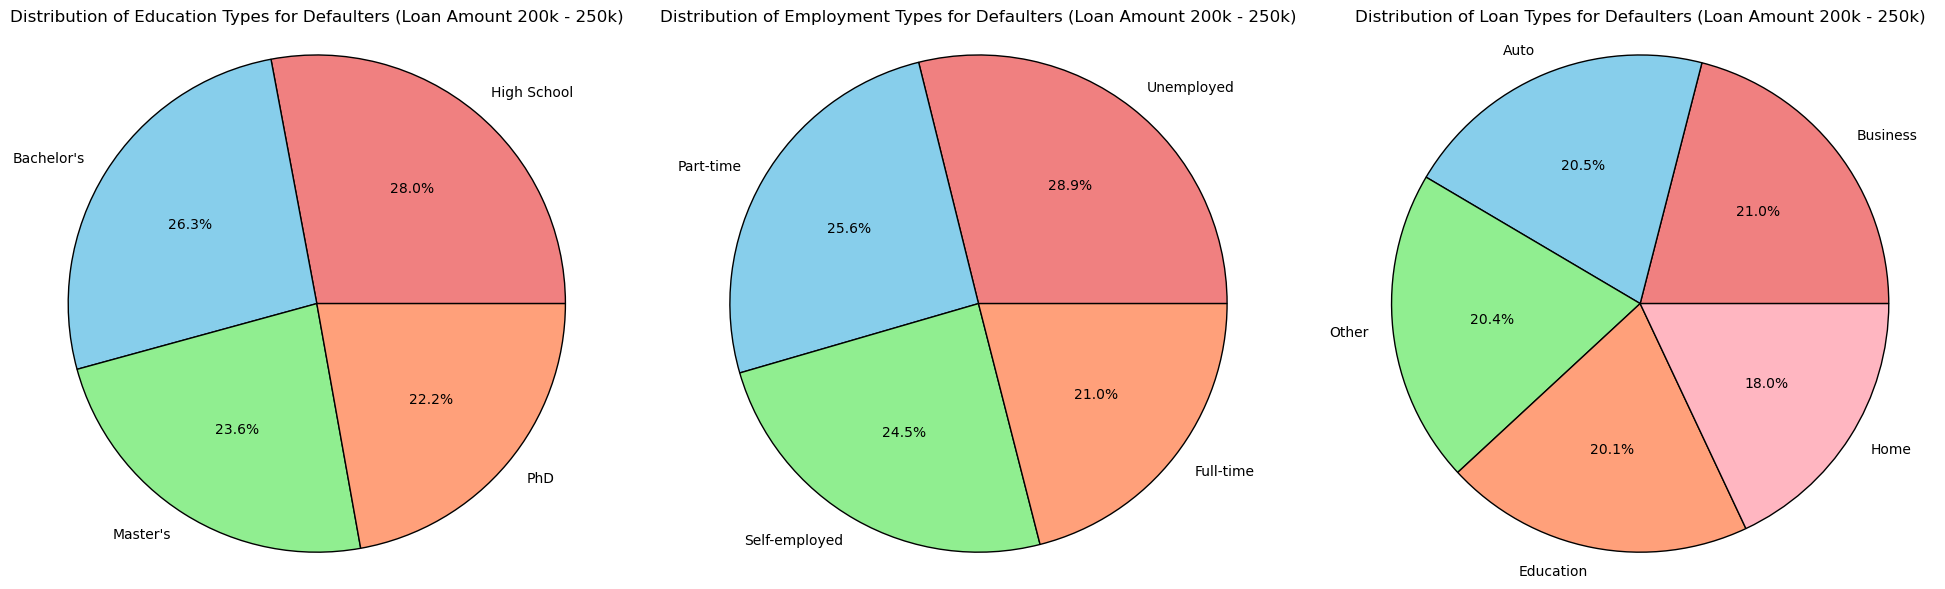

In [62]:
filtered_df = df[(df['loan_amount'] >= 200000) & (df['loan_amount'] <= 250000) & (df['defaulter'] == 1) ]

# Get the distribution of education
education_counts = filtered_df['education'].value_counts()

plt.figure(figsize=(20, 6))

# Plotting the distribution as a pie chart
plt.subplot(1, 3, 1)
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'skyblue', 'lightgreen', 'lightsalmon'],
        wedgeprops={'edgecolor': 'black'})

# Adding labels and title
plt.title('Distribution of Education Types for Defaulters (Loan Amount 200k - 250k)')
plt.axis('equal') 

# Get the distribution of employment type
employment_counts = filtered_df['employment_type'].value_counts()

# Plotting the distribution as a pie chart
plt.subplot(1, 3, 2)
plt.pie(employment_counts, labels=employment_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'skyblue', 'lightgreen', 'lightsalmon'],
        wedgeprops={'edgecolor': 'black'})

# Adding labels and title
plt.title('Distribution of Employment Types for Defaulters (Loan Amount 200k - 250k)')
plt.axis('equal') 

# Get the distribution of loan purpose
loan_purpose_counts = filtered_df['loan_purpose'].value_counts()

# Plotting the distribution as a pie chart
plt.subplot(1, 3, 3)
plt.pie(loan_purpose_counts, labels=loan_purpose_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'skyblue', 'lightgreen', 'lightsalmon', 'lightpink'],
        wedgeprops={'edgecolor': 'black'})

# Adding labels and title
plt.title('Distribution of Loan Types for Defaulters (Loan Amount 200k - 250k)')
plt.axis('equal')


plt.tight_layout()

# Show plot
plt.show()

#### Trend 6 - Lesser the Months Employed more the Chances of Default Rate

The correlation between months_employed and the TARGET is -0.0974
Median value for loan that was not repaid = 46.0000
Median value for loan that was repaid = 61.0000


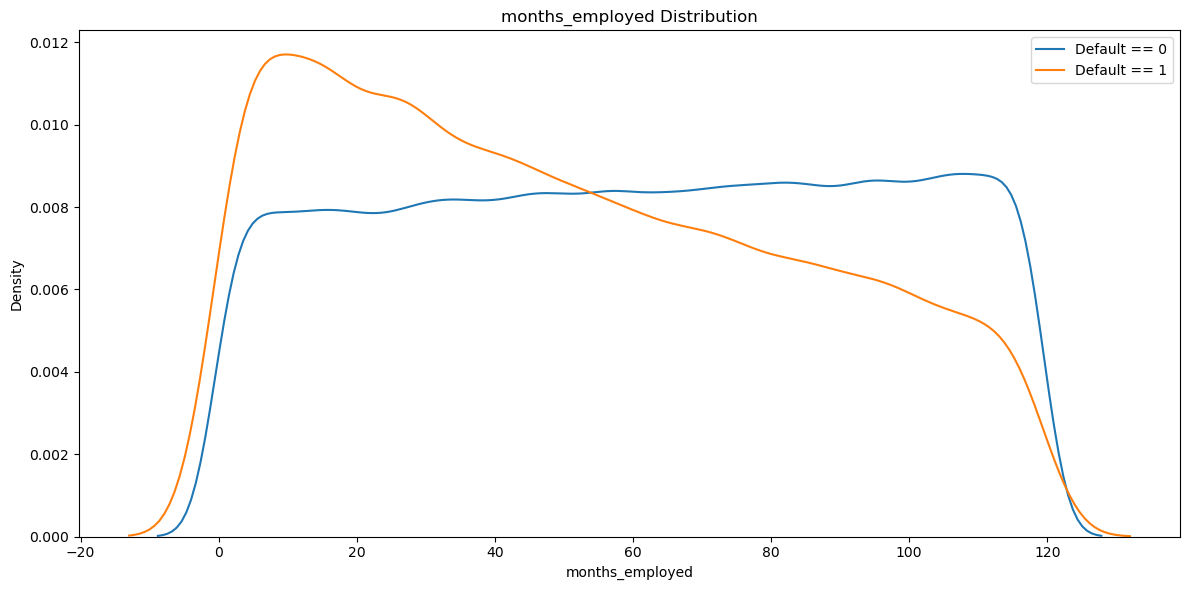

In [65]:
kde_default('months_employed', df)
plt.tight_layout()
plt.savefig('Trend_6.png')

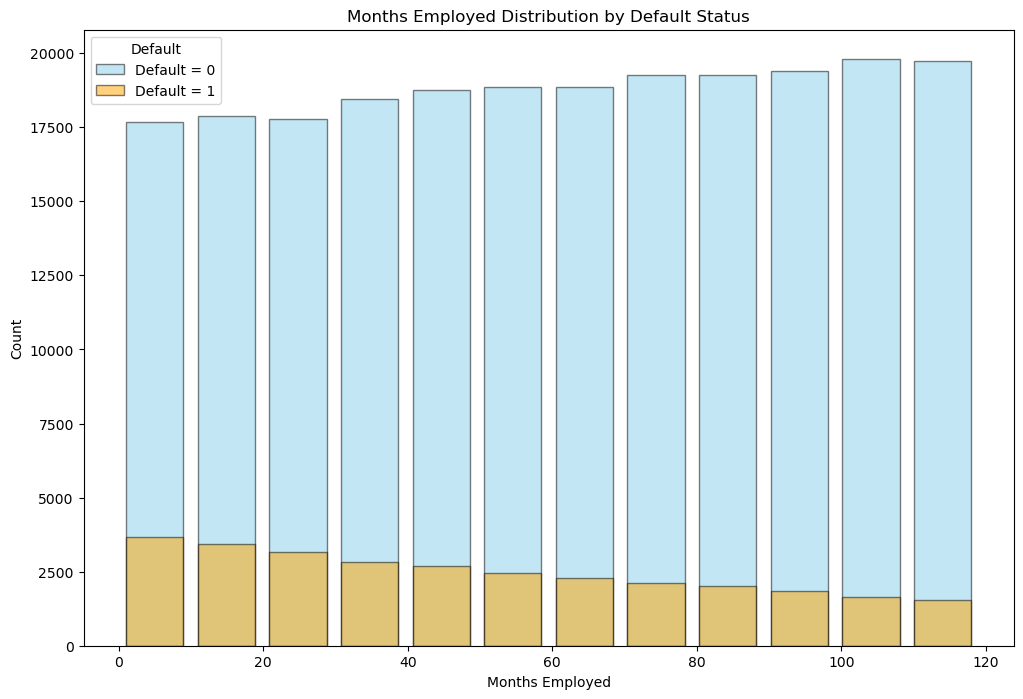

In [48]:
months_employed_default_0 = df[df['defaulter'] == 0]['months_employed']
months_employed_default_1 = df[df['defaulter'] == 1]['months_employed']

# Plotting histograms
plt.figure(figsize=(12, 8))
plt.hist(months_employed_default_0, bins=12, alpha=0.5, label='Default = 0', color='skyblue', edgecolor='black', rwidth = 0.8)
plt.hist(months_employed_default_1, bins=12, alpha=0.5, label='Default = 1', color='orange', edgecolor='black', rwidth = 0.8)

# Adding labels and title
plt.xlabel('Months Employed')
plt.ylabel('Count')
plt.title('Months Employed Distribution by Default Status')
plt.legend(title='Default')

plt.savefig('Trend_6_bar_graph.png')

# Show plot
plt.show()

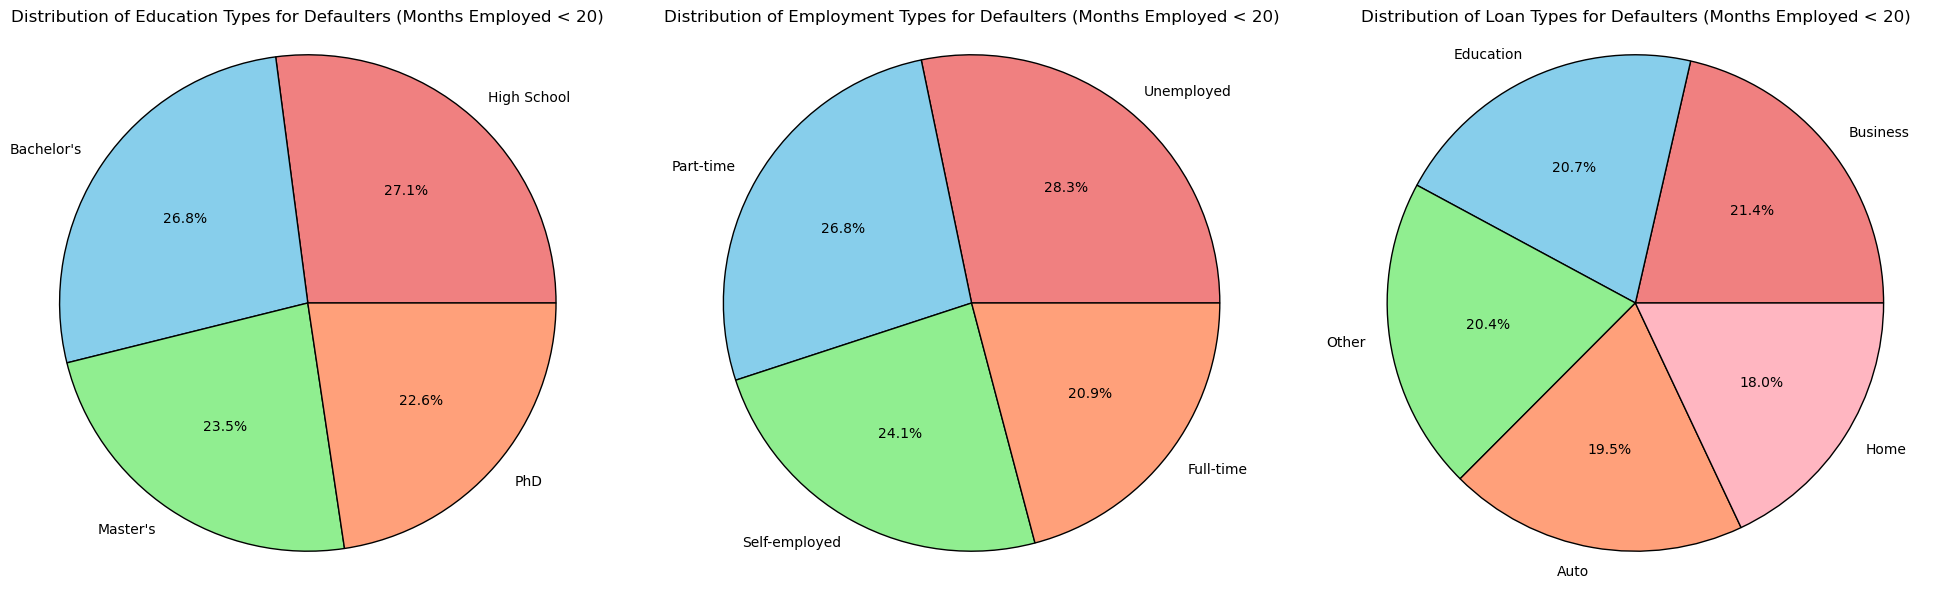

In [69]:
filtered_df = df[(df['months_employed'] < 20) & (df['defaulter'] == 1) ]

# Get the distribution of education
education_counts = filtered_df['education'].value_counts()

# Plotting the distribution as a pie chart
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'skyblue', 'lightgreen', 'lightsalmon'],
        wedgeprops={'edgecolor': 'black'})

# Adding labels and title
plt.title('Distribution of Education Types for Defaulters (Months Employed < 20)')
plt.axis('equal') 

# Get the distribution of employment type
employment_counts = filtered_df['employment_type'].value_counts()

# Plotting the distribution as a pie chart
plt.subplot(1, 3, 2)
plt.pie(employment_counts, labels=employment_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'skyblue', 'lightgreen', 'lightsalmon'],
        wedgeprops={'edgecolor': 'black'})

# Adding labels and title
plt.title('Distribution of Employment Types for Defaulters (Months Employed < 20)')
plt.axis('equal')

# Get the distribution of loan purpose
loan_purpose_counts = filtered_df['loan_purpose'].value_counts()

# Plotting the distribution as a pie chart
plt.subplot(1, 3, 3)
plt.pie(loan_purpose_counts, labels=loan_purpose_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'skyblue', 'lightgreen', 'lightsalmon', 'lightpink'],
        wedgeprops={'edgecolor': 'black'})

# Adding labels and title
plt.title('Distribution of Loan Types for Defaulters (Months Employed < 20)')
plt.axis('equal')


plt.tight_layout()

# Show plot
plt.show()